In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import json
import joblib
from pathlib import Path
%matplotlib inline

In [4]:
data_path = 'data/S06-hw-dataset-01.csv' 
df = pd.read_csv(data_path)
df.head()  # Показать первые 5 строк

,id,num01,num02,num03,num04,num05,num06,num07,num08,num09,...,num20,num21,num22,num23,num24,cat_contract,cat_region,cat_payment,tenure_months,target
0,1,-0.946058,-0.070313,1.824445,-2.754422,0.808865,-0.111094,-0.268950,-3.078210,0.801275,...,-1.616515,-1.989464,1.407390,-0.218362,2.016052,0,2,3,33,0
1,2,-2.484027,0.739378,1.596908,-2.586479,-0.033225,-3.054412,-4.706908,-9.795169,0.145911,...,-1.727040,-0.583997,1.136761,0.285978,-0.310879,2,2,2,102,1
2,3,1.522629,7.159635,-0.564903,-4.493110,1.623610,5.450187,-0.974595,-5.189589,1.600591,...,0.524408,2.022430,1.278358,-0.850547,0.847457,1,0,2,3,0
3,4,0.463373,-1.073908,1.752813,0.362786,2.790872,4.082385,0.322283,3.390984,-0.033929,...,2.399834,-1.431576,-0.746987,0.049639,2.414689,1,0,1,50,0
4,5,3.188390,-4.701692,-0.689918,-0.448995,0.373821,-3.275363,-1.760931,0.923689,0.537345,...,-2.183407,-2.896590,2.440343,-1.097168,1.457323,1,2,3,81,0


## 1. Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             12000 non-null  int64  
 1   num01          12000 non-null  float64
 2   num02          12000 non-null  float64
 3   num03          12000 non-null  float64
 4   num04          12000 non-null  float64
 5   num05          12000 non-null  float64
 6   num06          12000 non-null  float64
 7   num07          12000 non-null  float64
 8   num08          12000 non-null  float64
 9   num09          12000 non-null  float64
 10  num10          12000 non-null  float64
 11  num11          12000 non-null  float64
 12  num12          12000 non-null  float64
 13  num13          12000 non-null  float64
 14  num14          12000 non-null  float64
 15  num15          12000 non-null  float64
 16  num16          12000 non-null  float64
 17  num17          12000 non-null  float64
 18  num18 

In [6]:
df.describe()

,id,num01,num02,num03,num04,num05,num06,num07,num08,num09,...,num20,num21,num22,num23,num24,cat_contract,cat_region,cat_payment,tenure_months,target
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,0.013705,-0.005278,-0.002357,0.038404,-0.006301,-0.865297,-0.702877,-0.290694,-0.008154,...,-0.323083,-1.314833,0.319798,-0.002742,0.027459,0.988750,1.990167,1.506833,36.083833,0.323417
std,3464.24595,2.096534,3.544498,1.004417,2.087318,1.007329,3.888966,1.989513,3.455981,0.996677,...,2.167066,3.731384,2.223649,0.996454,1.882359,0.815687,1.411643,1.121558,25.061218,0.467800
min,1.00000,-8.155181,-14.605579,-4.374043,-7.753301,-3.999332,-15.238402,-7.377252,-13.853627,-3.794637,...,-8.371050,-14.249204,-8.638879,-3.532093,-7.923990,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3000.75000,-1.423844,-2.303772,-0.685618,-1.374579,-0.676552,-3.532054,-2.064888,-2.597019,-0.683959,...,-1.808969,-3.863063,-1.097700,-0.676150,-1.110822,0.000000,1.000000,0.000000,17.000000,0.000000
50%,6000.50000,-0.047565,0.053348,-0.009186,0.038766,-0.003728,-1.092517,-0.795907,-0.208245,-0.020883,...,-0.383940,-1.393400,0.431804,0.006297,0.279689,1.000000,2.000000,2.000000,30.000000,0.000000
75%,9000.25000,1.422676,2.335937,0.671441,1.484417,0.669269,1.526389,0.522625,2.093169,0.666959,...,1.125140,1.116111,1.853491,0.657478,1.363896,2.000000,3.000000,3.000000,49.000000,1.000000
max,12000.00000,8.610863,16.299709,3.651692,7.571965,4.562115,16.223054,8.006444,13.030011,3.976868,...,7.957847,15.937281,8.102095,3.707905,7.549514,2.000000,4.000000,3.000000,120.000000,1.000000


In [7]:
df['target'].value_counts(normalize=True)

target
0    0.676583
1    0.323417
Name: proportion, dtype: float64

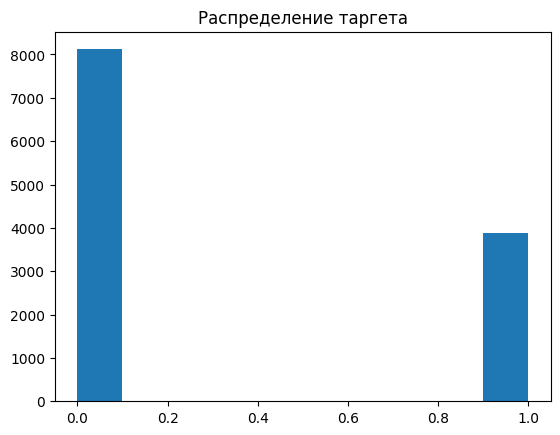

In [8]:
plt.hist(df['target'])
plt.title('Распределение таргета')
plt.show()

## EDA

Пропусков нет, таргет бинарный, дисбаланс ~0.4

In [9]:
y = df['target']  # Таргет
X = df.drop(columns=['id', 'target'])  # Признаки без id и таргета

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape)

(9600, 28) (2400, 28)


In [11]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)
y_proba_dummy = dummy.predict_proba(X_test)[:, 1]
acc_dummy = accuracy_score(y_test, y_pred_dummy)
f1_dummy = f1_score(y_test, y_pred_dummy)
roc_dummy = roc_auc_score(y_test, y_proba_dummy)
print(f'Dummy: Acc {acc_dummy:.3f}, F1 {f1_dummy:.3f}, ROC {roc_dummy:.3f}')

Dummy: Acc 0.677, F1 0.000, ROC 0.500


In [12]:
pipe_lr = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression())])
param_grid = {'lr__C': [0.01, 0.1, 1, 10]}
grid_lr = GridSearchCV(pipe_lr, param_grid, cv=5, scoring='roc_auc')
grid_lr.fit(X_train, y_train)
y_pred_lr = grid_lr.predict(X_test)
y_proba_lr = grid_lr.predict_proba(X_test)[:, 1]
acc_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_lr = roc_auc_score(y_test, y_proba_lr)
print(f'LogReg: Acc {acc_lr:.3f}, F1 {f1_lr:.3f}, ROC {roc_lr:.3f}')

LogReg: Acc 0.828, F1 0.708, ROC 0.875


In [13]:
tree = DecisionTreeClassifier(random_state=42)
param_grid = {'max_depth': [3, 5, 7, None], 'min_samples_leaf': [1, 2, 5]}
grid_tree = GridSearchCV(tree, param_grid, cv=5, scoring='roc_auc')
grid_tree.fit(X_train, y_train)
y_pred_tree = grid_tree.predict(X_test)
y_proba_tree = grid_tree.predict_proba(X_test)[:, 1]
acc_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
roc_tree = roc_auc_score(y_test, y_proba_tree)
print(f'Tree: Acc {acc_tree:.3f}, F1 {f1_tree:.3f}, ROC {roc_tree:.3f}')

Tree: Acc 0.869, F1 0.795, ROC 0.894


In [14]:
forest = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [50, 100], 'max_depth': [5, 10]}
grid_forest = GridSearchCV(forest, param_grid, cv=5, scoring='roc_auc')
grid_forest.fit(X_train, y_train)
y_pred_forest = grid_forest.predict(X_test)
y_proba_forest = grid_forest.predict_proba(X_test)[:, 1]
acc_forest = accuracy_score(y_test, y_pred_forest)
f1_forest = f1_score(y_test, y_pred_forest)
roc_forest = roc_auc_score(y_test, y_proba_forest)
print(f'Forest: Acc {acc_forest:.3f}, F1 {f1_forest:.3f}, ROC {roc_forest:.3f}')

Forest: Acc 0.912, F1 0.852, ROC 0.958


In [15]:
boost = GradientBoostingClassifier(random_state=42)
param_grid = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]}
grid_boost = GridSearchCV(boost, param_grid, cv=5, scoring='roc_auc')
grid_boost.fit(X_train, y_train)
y_pred_boost = grid_boost.predict(X_test)
y_proba_boost = grid_boost.predict_proba(X_test)[:, 1]
acc_boost = accuracy_score(y_test, y_pred_boost)
f1_boost = f1_score(y_test, y_pred_boost)
roc_boost = roc_auc_score(y_test, y_proba_boost)
print(f'Boost: Acc {acc_boost:.3f}, F1 {f1_boost:.3f}, ROC {roc_boost:.3f}')

Boost: Acc 0.905, F1 0.843, ROC 0.954


In [16]:
results = pd.DataFrame({
    'Model': ['Dummy', 'LogReg', 'Tree', 'Forest', 'Boost'],
    'Accuracy': [acc_dummy, acc_lr, acc_tree, acc_forest, acc_boost],
    'F1': [f1_dummy, f1_lr, f1_tree, f1_forest, f1_boost],
    'ROC-AUC': [roc_dummy, roc_lr, roc_tree, roc_forest, roc_boost]
})
results.to_json('artifacts/metrics_test.json', orient='records')
results

,Model,Accuracy,F1,ROC-AUC
0,Dummy,0.676667,0.000000,0.500000
1,LogReg,0.827500,0.708039,0.874680
2,Tree,0.869167,0.794771,0.893576
3,Forest,0.911667,0.851955,0.958133
4,Boost,0.905000,0.842541,0.954409


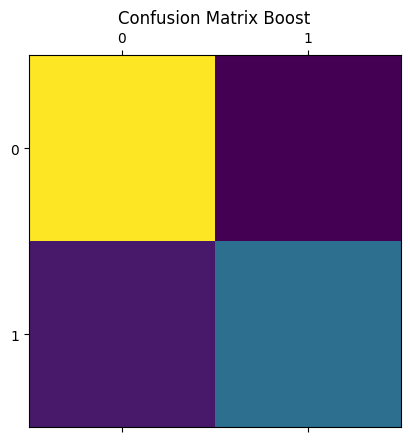

In [17]:
cm = confusion_matrix(y_test, y_pred_boost)
plt.matshow(cm)
plt.title('Confusion Matrix Boost')
plt.savefig('artifacts/figures/confusion_boost.png')
plt.show()

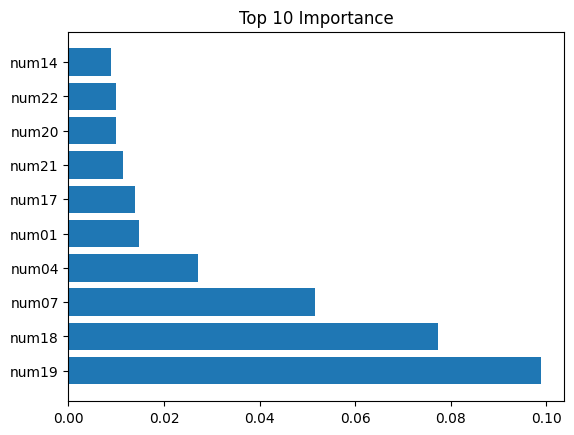

In [18]:
perm = permutation_importance(grid_boost.best_estimator_, X_test, y_test, n_repeats=10)
sorted_idx = perm.importances_mean.argsort()[::-1]
plt.barh(X.columns[sorted_idx][:10], perm.importances_mean[sorted_idx][:10])
plt.title('Top 10 Importance')
plt.savefig('artifacts/figures/importance.png')
plt.show()

In [19]:
joblib.dump(grid_boost.best_estimator_, 'artifacts/best_model.joblib')
meta = {'best_params': grid_boost.best_params_, 'roc_auc': roc_boost}
with open('artifacts/best_model_meta.json', 'w') as f:
    json.dump(meta, f)